In [1]:
import tensorflow as tf
import numpy as np
import Batch_Focusing,Batch_RWV_Generation,NTMCell
import matplotlib.pyplot as plt
import tensorboard

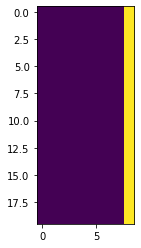

In [2]:
vector_dim = 8
batch_size = 20

plt.imshow(tf.one_hot([vector_dim] * batch_size, depth=vector_dim+1))

### By subclassing the tf.keras.Model class: in that case, you should define your layers in __init__ and you should implement the model's forward pass in call.

In [3]:
cell = NTMCell.NTMCell(100, 128, 20, 2, 2, 8)  #Use, 120,10
#tf.keras.layers.RNN()

In [4]:
batch_size = 36
timesteps = 20
features = 8
inputs = 0.420*tf.random.uniform([batch_size,timesteps,features])

In [5]:
init_state = cell.get_initial_state(batch_size = batch_size)

In [6]:
outputs= tf.compat.v1.nn.dynamic_rnn(cell,inputs=inputs,initial_state=init_state)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [19]:
#NTM = tf.keras.layers.RNN(cell)
#Not-Compatible with current implementation till now

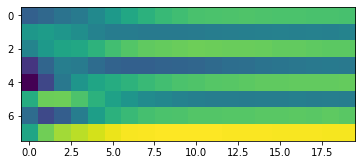

In [7]:
plt.imshow(tf.transpose(outputs[0][9]))

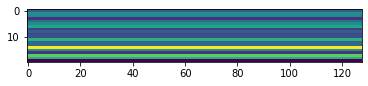

In [8]:
plt.imshow(tf.transpose(outputs[1]['Memory_Matrix'][9]))

### Outputs[0] is of shape [batch_size, timesteps. features]

## Any NaNs??

In [9]:
np.any(outputs == np.nan)

False

## Figuring out Training

In [10]:
inputs_with_eof = tf.concat([inputs,np.zeros([batch_size,timesteps,1])],axis = 2)

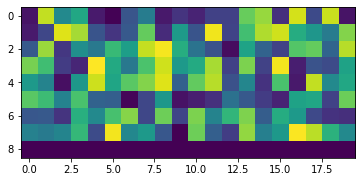

In [11]:
plt.imshow(tf.transpose(inputs_with_eof[0]))

In [15]:
inputs_with_eof

<tf.Tensor: id=115574, shape=(36, 20, 9), dtype=float32, numpy=
array([[[2.17241608e-02, 3.00846491e-02, 1.16330862e-01, ...,
         1.14176542e-01, 1.84171066e-01, 0.00000000e+00],
        [3.78886431e-01, 8.81248116e-02, 3.55656981e-01, ...,
         1.17382742e-01, 1.70919850e-01, 0.00000000e+00],
        [1.96433440e-01, 3.97932768e-01, 6.82973191e-02, ...,
         6.24221042e-02, 1.88460529e-01, 0.00000000e+00],
        ...,
        [9.36718360e-02, 2.19113752e-01, 3.18390250e-01, ...,
         9.17441174e-02, 3.74055475e-01, 0.00000000e+00],
        [3.84259224e-01, 1.73786834e-01, 1.34693667e-01, ...,
         6.15601838e-02, 2.67745763e-01, 0.00000000e+00],
        [2.24852432e-02, 3.39540869e-01, 3.73326093e-01, ...,
         5.69553412e-02, 1.96081072e-01, 0.00000000e+00]],

       [[3.39365229e-02, 4.07220453e-01, 3.22796464e-01, ...,
         2.56338596e-01, 1.49689108e-01, 0.00000000e+00],
        [1.44210473e-01, 3.38619709e-01, 3.62566696e-03, ...,
         8.00381452

In [16]:
cell = NTMCell.NTMCell(100, 128, 20, 2, 2, 9)

## 1. Calculating outputs of the batch after just one loop through the whole sequence of timesteps

In [17]:
outputs= tf.compat.v1.nn.dynamic_rnn(cell,inputs=inputs_with_eof,initial_state=init_state)

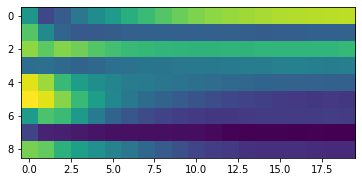

In [20]:
plt.imshow(tf.transpose(outputs[0][6]))

In [21]:
outputs[1]['Memory_Matrix'][7]

<tf.Tensor: id=231151, shape=(128, 20), dtype=float32, numpy=
array([[2.5035517, 2.5166564, 2.5944653, ..., 2.5942328, 2.468671 ,
        2.5056176],
       [2.5035918, 2.5166614, 2.5943894, ..., 2.5941749, 2.4687753,
        2.505624 ],
       [2.503577 , 2.5166607, 2.5943851, ..., 2.5941815, 2.468776 ,
        2.5057049],
       ...,
       [2.503577 , 2.5166607, 2.5943851, ..., 2.5941815, 2.468776 ,
        2.5057049],
       [2.5035517, 2.5166564, 2.5944653, ..., 2.5942328, 2.468671 ,
        2.5056176],
       [2.5035918, 2.5166614, 2.5943894, ..., 2.5941749, 2.4687753,
        2.505624 ]], dtype=float32)>

In [22]:
outputs[0]

<tf.Tensor: id=231129, shape=(36, 20, 9), dtype=float32, numpy=
array([[[-0.01009869,  0.3288306 ,  0.48545527, ...,  0.03903244,
         -0.5408758 ,  0.42598376],
        [-0.5384527 , -0.08446278,  0.345023  , ...,  0.30878916,
         -0.7070726 ,  0.38097236],
        [-0.39491236, -0.30858982,  0.46172112, ...,  0.24358346,
         -0.7312442 ,  0.20060915],
        ...,
        [ 0.5888653 , -0.36704713,  0.2232882 , ..., -0.58390933,
         -0.8623157 , -0.65717196],
        [ 0.6069119 , -0.3611609 ,  0.2248079 , ..., -0.58113146,
         -0.8628273 , -0.65684634],
        [ 0.61055994, -0.35326347,  0.22433566, ..., -0.56956106,
         -0.8721191 , -0.6636399 ]],

       [[-0.01486165,  0.3291606 ,  0.49242523, ...,  0.04192527,
         -0.52936727,  0.43266222],
        [-0.5387249 , -0.06428586,  0.34091473, ...,  0.3015941 ,
         -0.70233744,  0.38630995],
        [-0.39185283, -0.30513412,  0.4559814 , ...,  0.24820791,
         -0.7235259 ,  0.20579647],
   

## 2. Passing an EOF input, to signify end of this sequence

In [52]:
outputs_after_first_pass, state_after_first_pass = outputs[0],outputs[1]

In [59]:
eof_flag = np.zeros([batch_size,features+1])
eof_flag[:,features] = np.ones([batch_size,])

In [61]:
eof_flag,eof_flag.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0

In [62]:
state_after_first_pass

{'All_Read_vectors': <tf.Tensor: id=196570, shape=(2, 36, 10), dtype=float32, numpy=
 array([[[2.608518 , 2.6226451, 2.5740907, 2.5275714, 2.4930089,
          2.4424098, 2.5938215, 2.496031 , 2.5675015, 2.5660884],
         [2.6086438, 2.6227548, 2.5738251, 2.527971 , 2.4922945,
          2.4410138, 2.594384 , 2.4949002, 2.5677478, 2.5649064],
         [2.608472 , 2.6230452, 2.5743763, 2.5283453, 2.4929895,
          2.4413512, 2.5940034, 2.4955244, 2.5675967, 2.565602 ],
         [2.6083086, 2.6227462, 2.5741088, 2.5279684, 2.494151 ,
          2.4407215, 2.594287 , 2.495166 , 2.5677674, 2.5649378],
         [2.6081834, 2.623214 , 2.5746052, 2.5277224, 2.4930756,
          2.4416804, 2.5944145, 2.4951575, 2.5677023, 2.564935 ],
         [2.6082258, 2.6228898, 2.5745463, 2.5272932, 2.4937532,
          2.440756 , 2.594394 , 2.4954302, 2.5670521, 2.565334 ],
         [2.6087945, 2.622823 , 2.5743854, 2.5280886, 2.4936764,
          2.4410813, 2.5937073, 2.495716 , 2.5669181, 2.5655282]

In [63]:
output_after_eof_flag, states_after_eof_flag = cell(eof_flag,state_after_first_pass)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



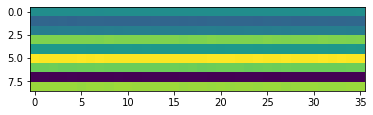

In [66]:
plt.imshow(tf.transpose(output_after_eof_flag))

### The above shows the individual timestep after inputting a eof vector to each input of the batch

## 3. Now we will input the Empty area of the time sequence

In [73]:
final_inputs = np.zeros([batch_size,timesteps,features+1])

In [74]:
final_outputs= tf.compat.v1.nn.dynamic_rnn(cell,inputs=final_inputs,initial_state=states_after_eof_flag)

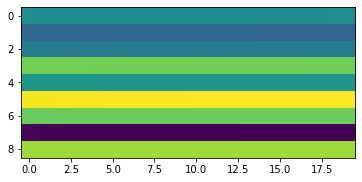

In [78]:
plt.imshow(tf.transpose(final_outputs[0][0]))

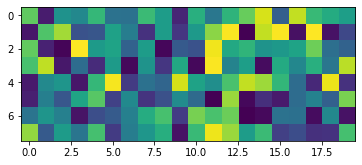

In [80]:
plt.imshow(tf.transpose(inputs[0]))

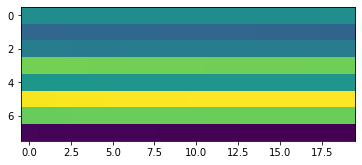

In [86]:
plt.imshow(tf.transpose(final_outputs[0][:,:,:features][0]))

## Defining above tasks as function

In [113]:
def Model(inputs , init_state = None,rnn_size = 100, memory_rows = 120, memory_columns = 10, n_RH = 2, n_WH = 2, batch_size = 36, timesteps = 20, features = 8):
    
    
    inputs_with_eof = tf.concat([inputs,np.zeros([batch_size,timesteps,1])],axis = 2)
    cell = NTMCell.NTMCell(rnn_size, memory_rows, memory_columns, n_RH, n_WH, features+1)
    
    if init_state == None:
        init_state = cell.get_initial_state(batch_size = batch_size)
        
    outputs= tf.compat.v1.nn.dynamic_rnn(cell,inputs=inputs_with_eof,initial_state=init_state)
    outputs_after_first_pass, state_after_first_pass = outputs[0],outputs[1]
    eof_flag = np.zeros([batch_size,features+1])
    eof_flag[:,features] = np.ones([batch_size,])
    output_after_eof_flag, states_after_eof_flag = cell(eof_flag,state_after_first_pass)
    final_inputs = np.zeros([batch_size,timesteps,features+1])
    final_outputs= tf.compat.v1.nn.dynamic_rnn(cell,inputs=final_inputs,initial_state=states_after_eof_flag)
    return (final_outputs[0][:,:,:features], final_outputs[1])

In [104]:
ops = Model(inputs)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



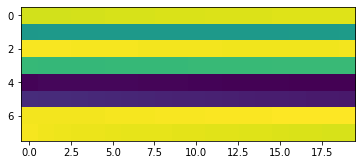

In [112]:
plt.imshow(tf.transpose(ops[0][35]))

In [114]:
ops2 = Model(ops[0],ops[1])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



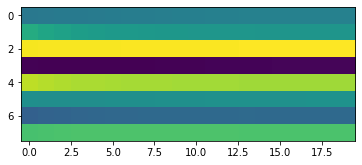

In [115]:
plt.imshow(tf.transpose(ops2[0][35]))

In [118]:
output = inputs     #Please note you might need to change it
state = init_state  #----------------""----------------
output_list_for_each_epoch = []
states_list_for_each_epoch = []
for i in range(10):
    output, state = Model(output, state)
    output_list_for_each_epoch.append(output)
    states_list_for_each_epoch.append(state)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [138]:
inputs = inputs * 100

In [145]:
inputs = np.array(inputs)

In [146]:
inputs[inputs >1] = 1

In [147]:
inputs[inputs<1] = 0

In [150]:
inputs = tf.convert_to_tensor(inputs)

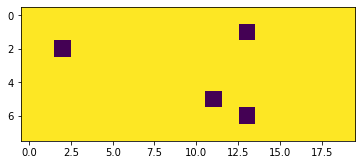

In [161]:
plt.imshow(tf.transpose(inputs[0]))

In [158]:
output = inputs     #Please note you might need to change it
state = init_state  #----------------""----------------
output_list_for_each_epoch = []
states_list_for_each_epoch = []
for i in range(10):
    output, state = Model(output, state)
    output_list_for_each_epoch.append(output)
    states_list_for_each_epoch.append(state)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

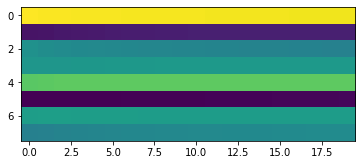

In [169]:
plt.imshow(tf.transpose(output[0]),interpolation='nearest')

# Trying Something else

In [186]:
state = cell.get_initial_state(batch_size=36)
cell = NTMCell.NTMCell(100,128,20,1,1,8,shift_range=tf.range(1))
all_outputs = []
for t in range(timesteps):
    output,state = cell(inputs[:,t,:],state)
    all_outputs.append(output)

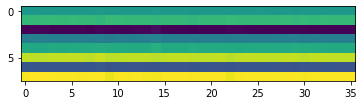

In [205]:
plt.imshow(tf.transpose(all_outputs[19]))

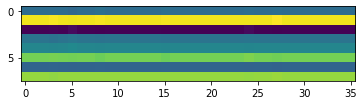

In [206]:
plt.imshow(tf.transpose(all_outputs[0]))